# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework1.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)
    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    print (optimiser.eval_monitors(test_data, '(test)'))

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')
    fig_1.tight_layout()
    fig_1.savefig('Epoch-Error.pdf')
    
    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_ylabel('Accuracy')
    fig_2.tight_layout()
    fig_2.savefig('Epoch-Accuracy.pdf')
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x00000201DFE71AC8>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x00000201E1B6A0B8>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x00000201E134A748>)


0
Learning rate:0.001


Epoch 1: 6.7s to complete
    error(train)=6.35e-01, acc(train)=7.97e-01, error(valid)=6.68e-01, acc(valid)=7.85e-01


1
Learning rate:0.0009991120277927223


Epoch 2: 5.5s to complete
    error(train)=5.40e-01, acc(train)=8.24e-01, error(valid)=5.92e-01, acc(valid)=8.10e-01


2
Learning rate:0.000996451615591515


Epoch 3: 6.2s to complete
    error(train)=4.84e-01, acc(train)=8.37e-01, error(valid)=5.49e-01, acc(valid)=8.21e-01


3
Learning rate:0.00099202926282791


Epoch 4: 6.2s to complete
    error(train)=4.52e-01, acc(train)=8.46e-01, error(valid)=5.32e-01, acc(valid)=8.24e-01


4
Learning rate:0.000985862422507884


Epoch 5: 6.0s to complete
    error(train)=4.41e-01, acc(train)=8.45e-01, error(valid)=5.32e-01, acc(valid)=8.23e-01


5
Learning rate:0.0009779754323328191


Epoch 6: 5.1s to complete
    error(train)=3.97e-01, acc(train)=8.62e-01, error(valid)=5.06e-01, acc(valid)=8.34e-01


6
Learning rate:0.0009683994186497131


Epoch 7: 6.1s to complete
    error(train)=3.88e-01, acc(train)=8.62e-01, error(valid)=5.09e-01, acc(valid)=8.32e-01


7
Learning rate:0.0009571721736097088


Epoch 8: 5.3s to complete
    error(train)=3.75e-01, acc(train)=8.66e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


8
Learning rate:0.0009443380060197386


Epoch 9: 5.2s to complete
    error(train)=3.53e-01, acc(train)=8.73e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01


9
Learning rate:0.0009299475664759069


Epoch 10: 5.6s to complete
    error(train)=3.39e-01, acc(train)=8.78e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


10
Learning rate:0.0009140576474687263


Epoch 11: 7.4s to complete
    error(train)=3.25e-01, acc(train)=8.82e-01, error(valid)=4.99e-01, acc(valid)=8.41e-01


11
Learning rate:0.0008967309592491052


Epoch 12: 7.5s to complete
    error(train)=3.14e-01, acc(train)=8.85e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


12
Learning rate:0.0008780358823396353


Epoch 13: 7.1s to complete
    error(train)=3.27e-01, acc(train)=8.80e-01, error(valid)=5.28e-01, acc(valid)=8.33e-01


13
Learning rate:0.0008580461976679099


Epoch 14: 5.7s to complete
    error(train)=3.02e-01, acc(train)=8.88e-01, error(valid)=5.07e-01, acc(valid)=8.39e-01


14
Learning rate:0.0008368407953869105


Epoch 15: 5.7s to complete
    error(train)=2.86e-01, acc(train)=8.94e-01, error(valid)=5.06e-01, acc(valid)=8.41e-01


15
Learning rate:0.000814503363531613


Epoch 16: 6.4s to complete
    error(train)=2.78e-01, acc(train)=8.95e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


16
Learning rate:0.0007911220577405485


Epoch 17: 6.3s to complete
    error(train)=2.74e-01, acc(train)=8.98e-01, error(valid)=5.17e-01, acc(valid)=8.39e-01


17
Learning rate:0.0007667891533457719


Epoch 18: 5.5s to complete
    error(train)=2.60e-01, acc(train)=9.01e-01, error(valid)=5.12e-01, acc(valid)=8.43e-01


18
Learning rate:0.0007416006812042827


Epoch 19: 6.5s to complete
    error(train)=2.64e-01, acc(train)=9.00e-01, error(valid)=5.23e-01, acc(valid)=8.39e-01


19
Learning rate:0.0007156560487081052


Epoch 20: 6.4s to complete
    error(train)=2.52e-01, acc(train)=9.05e-01, error(valid)=5.27e-01, acc(valid)=8.40e-01


20
Learning rate:0.0006890576474687264


Epoch 21: 6.0s to complete
    error(train)=2.45e-01, acc(train)=9.08e-01, error(valid)=5.31e-01, acc(valid)=8.39e-01


21
Learning rate:0.0006619104492241848


Epoch 22: 5.8s to complete
    error(train)=2.37e-01, acc(train)=9.09e-01, error(valid)=5.32e-01, acc(valid)=8.41e-01


22
Learning rate:0.0006343215915635762


Epoch 34: 5.8s to complete
    error(train)=1.67e-01, acc(train)=9.37e-01, error(valid)=6.02e-01, acc(valid)=8.39e-01


34
Learning rate:0.0003088779422594514


Epoch 35: 7.2s to complete
    error(train)=1.65e-01, acc(train)=9.38e-01, error(valid)=6.05e-01, acc(valid)=8.40e-01


35
Learning rate:0.00028549663646838715


Epoch 36: 7.2s to complete
    error(train)=1.65e-01, acc(train)=9.38e-01, error(valid)=6.15e-01, acc(valid)=8.39e-01


36
Learning rate:0.0002631592046130896


Epoch 37: 5.8s to complete
    error(train)=1.58e-01, acc(train)=9.40e-01, error(valid)=6.14e-01, acc(valid)=8.41e-01


37
Learning rate:0.00024195380233209008


Epoch 38: 6.0s to complete
    error(train)=1.56e-01, acc(train)=9.41e-01, error(valid)=6.27e-01, acc(valid)=8.38e-01


38
Learning rate:0.0002219641176603649


Epoch 39: 6.1s to complete
    error(train)=1.51e-01, acc(train)=9.43e-01, error(valid)=6.22e-01, acc(valid)=8.40e-01


39
Learning rate:0.00020326904075089488


Epoch 40: 6.4s to complete
    error(train)=1.47e-01, acc(train)=9.45e-01, error(valid)=6.28e-01, acc(valid)=8.41e-01


40
Learning rate:0.00018594235253127368


Epoch 41: 6.0s to complete
    error(train)=1.46e-01, acc(train)=9.45e-01, error(valid)=6.38e-01, acc(valid)=8.39e-01


41
Learning rate:0.00017005243352409332


Epoch 42: 7.3s to complete
    error(train)=1.44e-01, acc(train)=9.47e-01, error(valid)=6.43e-01, acc(valid)=8.39e-01


42
Learning rate:0.00015566199398026143


Epoch 43: 6.5s to complete
    error(train)=1.43e-01, acc(train)=9.46e-01, error(valid)=6.43e-01, acc(valid)=8.41e-01


43
Learning rate:0.0001428278263902913


Epoch 44: 7.5s to complete
    error(train)=1.41e-01, acc(train)=9.47e-01, error(valid)=6.49e-01, acc(valid)=8.40e-01


44
Learning rate:0.0001316005813502869


Epoch 45: 6.2s to complete
    error(train)=1.38e-01, acc(train)=9.50e-01, error(valid)=6.53e-01, acc(valid)=8.40e-01


45
Learning rate:0.00012202456766718092


Epoch 46: 5.4s to complete
    error(train)=1.36e-01, acc(train)=9.49e-01, error(valid)=6.55e-01, acc(valid)=8.41e-01


46
Learning rate:0.00011413757749211603


Epoch 47: 6.0s to complete
    error(train)=1.37e-01, acc(train)=9.48e-01, error(valid)=6.64e-01, acc(valid)=8.40e-01


47
Learning rate:0.00010797073717209013


Epoch 48: 5.6s to complete
    error(train)=1.35e-01, acc(train)=9.50e-01, error(valid)=6.66e-01, acc(valid)=8.39e-01


48
Learning rate:0.00010354838440848502


Epoch 49: 7.1s to complete
    error(train)=1.34e-01, acc(train)=9.51e-01, error(valid)=6.70e-01, acc(valid)=8.37e-01


49
Learning rate:0.0001008879722072778


Epoch 50: 5.5s to complete
    error(train)=1.32e-01, acc(train)=9.51e-01, error(valid)=6.74e-01, acc(valid)=8.36e-01


50
Learning rate:0.0009000000000000001


Epoch 51: 6.8s to complete
    error(train)=2.16e-01, acc(train)=9.14e-01, error(valid)=6.67e-01, acc(valid)=8.34e-01


51
Learning rate:0.0008992106913713087


Epoch 52: 5.7s to complete
    error(train)=2.08e-01, acc(train)=9.17e-01, error(valid)=6.77e-01, acc(valid)=8.29e-01


52
Learning rate:0.0008968458805257912


Epoch 53: 5.5s to complete
    error(train)=2.11e-01, acc(train)=9.15e-01, error(valid)=6.71e-01, acc(valid)=8.31e-01


53
Learning rate:0.0008929149002914757


Epoch 54: 5.8s to complete
    error(train)=2.12e-01, acc(train)=9.14e-01, error(valid)=6.75e-01, acc(valid)=8.23e-01


54
Learning rate:0.0008874332644514525


Epoch 55: 5.7s to complete
    error(train)=2.09e-01, acc(train)=9.16e-01, error(valid)=6.73e-01, acc(valid)=8.31e-01


55
Learning rate:0.0008804226065180615


Epoch 56: 5.7s to complete
    error(train)=1.95e-01, acc(train)=9.22e-01, error(valid)=6.55e-01, acc(valid)=8.32e-01


56
Learning rate:0.0008719105943553006


Epoch 57: 5.6s to complete
    error(train)=2.02e-01, acc(train)=9.19e-01, error(valid)=6.85e-01, acc(valid)=8.28e-01


57
Learning rate:0.0008619308209864079


Epoch 58: 5.6s to complete
    error(train)=1.93e-01, acc(train)=9.23e-01, error(valid)=6.79e-01, acc(valid)=8.30e-01


58
Learning rate:0.0008505226720175455


Epoch 59: 5.2s to complete
    error(train)=1.96e-01, acc(train)=9.21e-01, error(valid)=6.87e-01, acc(valid)=8.26e-01


59
Learning rate:0.0008377311702008061


Epoch 60: 6.4s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=6.70e-01, acc(valid)=8.30e-01


60
Learning rate:0.0008236067977499791


Epoch 61: 6.7s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=6.83e-01, acc(valid)=8.31e-01


61
Learning rate:0.0008082052971103158


Epoch 62: 6.5s to complete
    error(train)=1.72e-01, acc(train)=9.31e-01, error(valid)=6.89e-01, acc(valid)=8.34e-01


62
Learning rate:0.0007915874509685647


Epoch 63: 6.9s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=7.08e-01, acc(valid)=8.29e-01


63
Learning rate:0.0007738188423714755


Epoch 64: 5.6s to complete
    error(train)=1.66e-01, acc(train)=9.34e-01, error(valid)=6.97e-01, acc(valid)=8.31e-01


64
Learning rate:0.000754969595899476


Epoch 65: 9.3s to complete
    error(train)=1.72e-01, acc(train)=9.31e-01, error(valid)=7.12e-01, acc(valid)=8.31e-01


65
Learning rate:0.0007351141009169893


Epoch 66: 6.8s to complete
    error(train)=1.63e-01, acc(train)=9.35e-01, error(valid)=7.15e-01, acc(valid)=8.31e-01


66
Learning rate:0.0007143307179915987


Epoch 67: 7.8s to complete
    error(train)=1.61e-01, acc(train)=9.35e-01, error(valid)=7.17e-01, acc(valid)=8.32e-01


67
Learning rate:0.0006927014696406861


Epoch 68: 6.6s to complete
    error(train)=1.55e-01, acc(train)=9.38e-01, error(valid)=7.19e-01, acc(valid)=8.32e-01


68
Learning rate:0.0006703117166260292


Epoch 69: 5.8s to complete
    error(train)=1.48e-01, acc(train)=9.42e-01, error(valid)=7.17e-01, acc(valid)=8.32e-01


69
Learning rate:0.0006472498210738714


Epoch 70: 6.6s to complete
    error(train)=1.51e-01, acc(train)=9.40e-01, error(valid)=7.45e-01, acc(valid)=8.31e-01


70
Learning rate:0.0006236067977499791


Epoch 71: 6.1s to complete
    error(train)=1.49e-01, acc(train)=9.40e-01, error(valid)=7.63e-01, acc(valid)=8.29e-01


71
Learning rate:0.0005994759548659421


Epoch 72: 6.7s to complete
    error(train)=1.45e-01, acc(train)=9.42e-01, error(valid)=7.53e-01, acc(valid)=8.31e-01


72
Learning rate:0.00057495252583429


Epoch 73: 7.8s to complete
    error(train)=1.46e-01, acc(train)=9.42e-01, error(valid)=7.63e-01, acc(valid)=8.25e-01


73
Learning rate:0.0005501332934257217


Epoch 74: 6.6s to complete
    error(train)=1.33e-01, acc(train)=9.47e-01, error(valid)=7.67e-01, acc(valid)=8.33e-01


74
Learning rate:0.0005251162078117255


Epoch 75: 6.6s to complete
    error(train)=1.30e-01, acc(train)=9.50e-01, error(valid)=7.67e-01, acc(valid)=8.28e-01


75
Learning rate:0.0005


Epoch 76: 7.9s to complete
    error(train)=1.26e-01, acc(train)=9.50e-01, error(valid)=7.96e-01, acc(valid)=8.31e-01


76
Learning rate:0.00047488379218827467


Epoch 77: 6.9s to complete
    error(train)=1.19e-01, acc(train)=9.54e-01, error(valid)=7.85e-01, acc(valid)=8.32e-01


77
Learning rate:0.00044986670657427825


Epoch 78: 6.6s to complete
    error(train)=1.20e-01, acc(train)=9.53e-01, error(valid)=8.03e-01, acc(valid)=8.29e-01


78
Learning rate:0.00042504747416571007


Epoch 79: 6.6s to complete
    error(train)=1.15e-01, acc(train)=9.56e-01, error(valid)=8.05e-01, acc(valid)=8.30e-01


79
Learning rate:0.00040052404513405814


Epoch 80: 6.3s to complete
    error(train)=1.10e-01, acc(train)=9.57e-01, error(valid)=8.15e-01, acc(valid)=8.29e-01


80
Learning rate:0.0003763932022500211


Epoch 81: 7.6s to complete
    error(train)=1.10e-01, acc(train)=9.58e-01, error(valid)=8.22e-01, acc(valid)=8.31e-01


81
Learning rate:0.00035275017892612883


Epoch 82: 6.9s to complete
    error(train)=1.09e-01, acc(train)=9.58e-01, error(valid)=8.30e-01, acc(valid)=8.30e-01


82
Learning rate:0.00032968828337397095


Epoch 83: 7.0s to complete
    error(train)=9.84e-02, acc(train)=9.64e-01, error(valid)=8.34e-01, acc(valid)=8.31e-01


83
Learning rate:0.0003072985303593138


Epoch 84: 6.9s to complete
    error(train)=9.87e-02, acc(train)=9.63e-01, error(valid)=8.49e-01, acc(valid)=8.32e-01


84
Learning rate:0.0002856692820084013


Epoch 85: 7.8s to complete
    error(train)=9.60e-02, acc(train)=9.64e-01, error(valid)=8.56e-01, acc(valid)=8.31e-01


85
Learning rate:0.0002648858990830108


Epoch 86: 7.0s to complete
    error(train)=9.49e-02, acc(train)=9.64e-01, error(valid)=8.68e-01, acc(valid)=8.32e-01


86
Learning rate:0.0002450304041005241


Epoch 87: 7.9s to complete
    error(train)=9.01e-02, acc(train)=9.67e-01, error(valid)=8.71e-01, acc(valid)=8.32e-01


87
Learning rate:0.00022618115762852454


Epoch 88: 6.7s to complete
    error(train)=8.81e-02, acc(train)=9.68e-01, error(valid)=8.79e-01, acc(valid)=8.31e-01


88
Learning rate:0.0002084125490314355


Epoch 89: 7.3s to complete
    error(train)=8.62e-02, acc(train)=9.68e-01, error(valid)=8.87e-01, acc(valid)=8.31e-01


89
Learning rate:0.00019179470288968435


Epoch 90: 6.0s to complete
    error(train)=8.70e-02, acc(train)=9.68e-01, error(valid)=9.09e-01, acc(valid)=8.28e-01


90
Learning rate:0.00017639320225002107


Epoch 91: 6.7s to complete
    error(train)=8.22e-02, acc(train)=9.70e-01, error(valid)=9.09e-01, acc(valid)=8.29e-01


91
Learning rate:0.00016226882979919406


Epoch 92: 5.1s to complete
    error(train)=8.28e-02, acc(train)=9.70e-01, error(valid)=9.14e-01, acc(valid)=8.31e-01


92
Learning rate:0.0001494773279824546


Epoch 93: 5.2s to complete
    error(train)=7.98e-02, acc(train)=9.71e-01, error(valid)=9.22e-01, acc(valid)=8.29e-01


93
Learning rate:0.00013806917901359225


Epoch 94: 5.7s to complete
    error(train)=7.85e-02, acc(train)=9.72e-01, error(valid)=9.23e-01, acc(valid)=8.29e-01


94
Learning rate:0.00012808940564469946


Epoch 95: 5.6s to complete
    error(train)=7.81e-02, acc(train)=9.72e-01, error(valid)=9.37e-01, acc(valid)=8.28e-01


95
Learning rate:0.0001195773934819386


Epoch 96: 5.8s to complete
    error(train)=7.79e-02, acc(train)=9.72e-01, error(valid)=9.43e-01, acc(valid)=8.30e-01


96
Learning rate:0.00011256673554854757


Epoch 97: 6.6s to complete
    error(train)=7.53e-02, acc(train)=9.73e-01, error(valid)=9.46e-01, acc(valid)=8.29e-01


97
Learning rate:0.00010708509970852457


Epoch 98: 5.5s to complete
    error(train)=7.48e-02, acc(train)=9.74e-01, error(valid)=9.52e-01, acc(valid)=8.29e-01


98
Learning rate:0.0001031541194742089


Epoch 99: 5.6s to complete
    error(train)=7.43e-02, acc(train)=9.74e-01, error(valid)=9.59e-01, acc(valid)=8.30e-01


99
Learning rate:0.00010078930862869138


Epoch 100: 6.6s to complete
    error(train)=7.37e-02, acc(train)=9.74e-01, error(valid)=9.60e-01, acc(valid)=8.30e-01



OrderedDict([('error(test)', 0.997699085326635), ('acc(test)', 0.8221518987341774)])


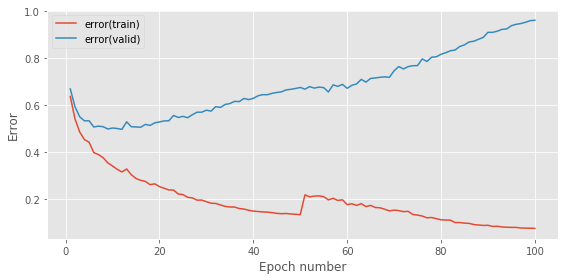

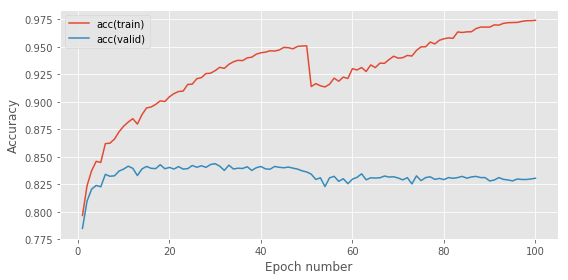

In [3]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdaGradLearningRule, RMSPropLearningRule, AdamLearningRule, GradientDescentLearningRule, AdamLearningRuleWithWeightDecay
from mlp.optimisers import Optimiser
from mlp.penalties import L2Penalty

#setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
weights_penalty = L2Penalty(coefficient=0.0001)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# To use schduler change optimizer.py
learning_rule =  AdamLearningRuleWithWeightDecay(learning_rate=learning_rate)


#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)